<a href="https://colab.research.google.com/github/KwonHo-geun/AI_Study/blob/main/25.07.11_%EC%9D%91%EC%9A%A9_%EC%9E%91%EC%84%B1%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU확인

In [4]:
import torch
# TODO : GPU 확인
dvc = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(dvc)

cuda:0


데이터 준비

In [8]:
import kagglehub
import shutil
import os

path = kagglehub.dataset_download("hongdcs/pokemon-gen1-151-classes-classification")
src = path  # kagglehub가 반환한 실제 경로
dst = "/content/pokemon-gen1-151-classes-classification"
os.symlink(src, dst)
print("심볼릭 링크 생성 완료:", dst)

print("Path to dataset files:", path)


심볼릭 링크 생성 완료: /content/pokemon-gen1-151-classes-classification
Path to dataset files: /root/.cache/kagglehub/datasets/hongdcs/pokemon-gen1-151-classes-classification/versions/1


In [15]:
# TODO : 경로 만들기

data_root = '/content/pokemon-gen1-151-classes-classification'
file_root = f"{data_root}/pkm_c_aug_new"

train_root = f"{data_root}/train"
valid_root = f"{data_root}/valid"
test_root = f"{data_root}/test"

#파일 자체를 만들기
cls_list = os.listdir(file_root)

for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)
    for cls in cls_list:
        cls_folder = f"{folder}/{cls}"
        if not os.path.exists(cls_folder):
            os.makedirs(cls_folder)


In [18]:
for cls in cls_list:
    file_list = os.listdir(f"{file_root}/{cls}")
    random.shuffle(file_list)
    test_ratio = 0.1
    num_file = len(file_list)

    test_list = file_list[:int(num_file*test_ratio)]
    valid_list = file_list[int(num_file*test_ratio):int(num_file*test_ratio)*2]
    train_list = file_list[int(num_file*test_ratio)*2:]
    for i in test_list:
        shutil.copyfile(f"{file_root}/{cls}/{i}", f"{test_root}/{cls}/{i}" )
    for i in valid_list:
        shutil.copyfile(f"{file_root}/{cls}/{i}", f"{valid_root}/{cls}/{i}" )
    for i in train_list:
        shutil.copyfile(f"{file_root}/{cls}/{i}", f"{train_root}/{cls}/{i}" )


IsADirectoryError: [Errno 21] Is a directory: '/content/pokemon-gen1-151-classes-classification/pkm_c_aug_new/Abra/.ipynb_checkpoints'

IndexError: list index out of range

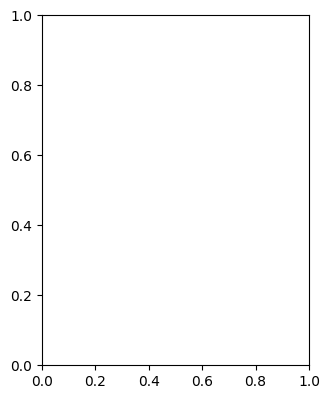

In [19]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random

test_file_list = glob.glob(f"{test_root}/*/*")
random.shuffle(test_file_list)

plt.figure(figsize = (20,10))
for i in range(9):
    test_img_path = os.path.join(test_root, test_file_list[i])
    ori_img = Image.open(test_img_path)
    plt.subplot(2, 5, (i+1))
    plt.title(test_file_list[i].split('\\')[-2])
    plt.imshow(ori_img)

plt.show()

데이터 전처리

FileNotFoundError: Couldn't find any class folder in /content/pokemon-gen1-151-classes-classification/pkm_c_aug_new/train.